In [1]:
from load_data import DataLoader
data_loader = DataLoader(data_type = 'dx', use_graph_embeddings=True)  

assign reindex to concepts
data reindexing


100%|██████████| 266558/266558 [00:06<00:00, 39805.25it/s]


vocab_size: 13256


In [2]:
final_embeddings = data_loader.final_embeddings

In [3]:
data = data_loader.reidx_dat

from training import Training
import torch
torch.cuda.set_device(1)
device = torch.device('cuda')
training = Training(data, vocab_size = 13256, device = device, final_embeddings = final_embeddings)

create datasets
create trainloaders


In [4]:
best_model, train_loss, val_loss = training.training()

Epoch [1/500], Train Loss: 0.10886485833439323
Epoch [1/500], Val Loss: 0.03443151170478425
Epoch [2/500], Train Loss: 0.03433496365305029
Epoch [2/500], Val Loss: 0.034510040702969105
Epoch [3/500], Train Loss: 0.03399284793508044
Epoch [3/500], Val Loss: 0.033249692540179204
Epoch [4/500], Train Loss: 0.028677169377693816
Epoch [4/500], Val Loss: 0.02709059112034889
Epoch [5/500], Train Loss: 0.025638730839171
Epoch [5/500], Val Loss: 0.02688593570098123
Epoch [6/500], Train Loss: 0.02525968800729825
Epoch [6/500], Val Loss: 0.02659343433986912
Epoch [7/500], Train Loss: 0.024899435007576496
Epoch [7/500], Val Loss: 0.026302049283426263
Epoch [8/500], Train Loss: 0.02474853769380308
Epoch [8/500], Val Loss: 0.026058157024995088
Epoch [9/500], Train Loss: 0.024454537168087043
Epoch [9/500], Val Loss: 0.026143524591694445
Epoch [10/500], Train Loss: 0.02427733208885004
Epoch [10/500], Val Loss: 0.025834588370545034
Epoch [11/500], Train Loss: 0.024094627536486696
Epoch [11/500], Val Lo

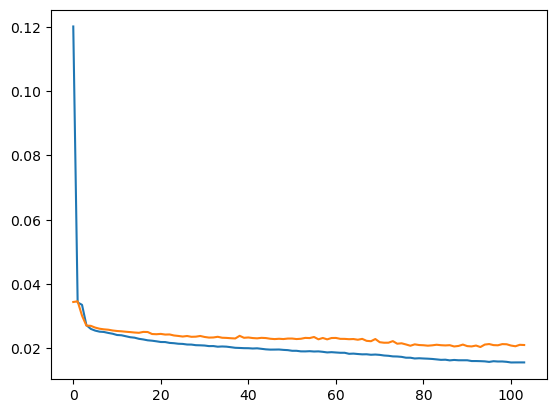

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_loss)
plt.plot(val_loss)

In [ ]:
import pickle

torch.save(best_model, 'model/tf_gnn_static_dx.pt')
with open('model/train_losses_tf_gnn_static_dx.pickle', 'wb') as handle:
    pickle.dump(train_loss, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/val_losses_tf_gnn_static_dx.pickle', 'wb') as handle:
    pickle.dump(val_loss, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
model = training.model

test_data = training.data_splits.test_data
_, _, test_ids = training.data_splits.split_ids()

from evaluate_performance import Evaluate
ev = Evaluate(test_data, test_ids, model, 'model/tf_gnn_static_dx.pt')

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [01:07<00:00, 13.47s/it]


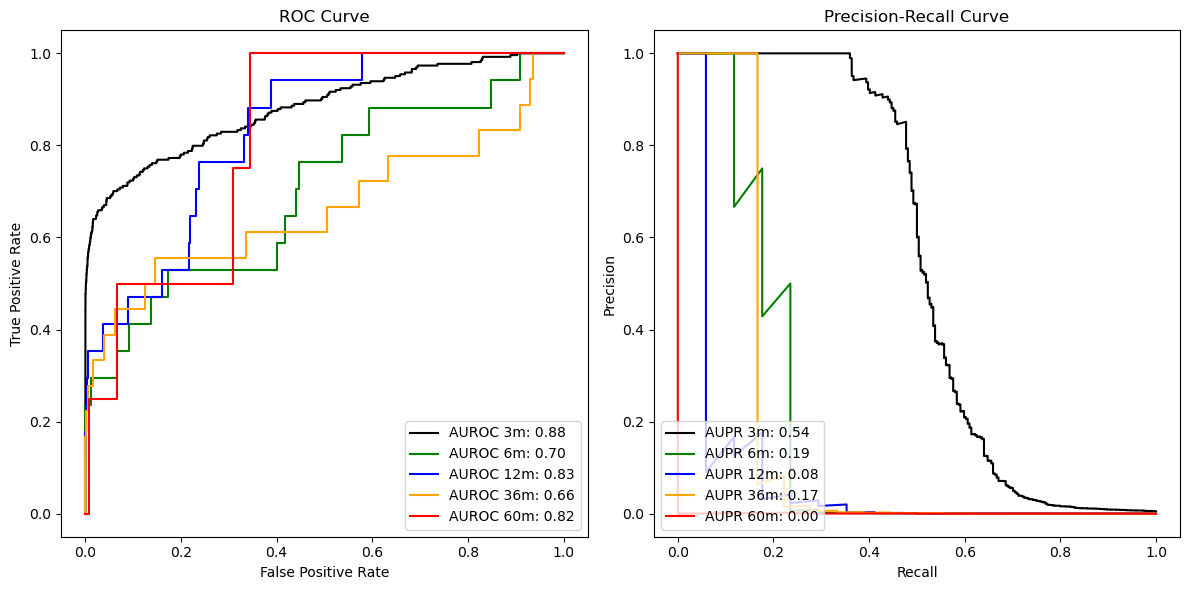

sensitivity at 0.999 specificity: {'3m': 0.48863636363636365, '6m': 0.23529411764705882, '12m': 0.17647058823529413, '36m': 0.2222222222222222, '60m': 0.0}
specificity at 0.999 sensitivity: {'3m': array(0.09684481), '6m': array(0.09050423), '12m': array(0.42181839), '36m': array(0.06387757), '60m': array(0.65543856)}


In [10]:
ev.sens_spec(specAt = 0.999)

assign reindex to concepts
data reindexing


100%|██████████| 266558/266558 [00:05<00:00, 48231.46it/s]


vocab_size: 13256
create datasets
create trainloaders


100%|██████████| 5/5 [01:19<00:00, 15.81s/it]


Epoch 1/100
8290/8290 [==============================] - 29s 3ms/step - loss: 0.0011 - val_loss: 9.8842e-04
Epoch 2/100
8290/8290 [==============================] - 29s 3ms/step - loss: 0.0010 - val_loss: 9.7864e-04
Epoch 3/100
8290/8290 [==============================] - 28s 3ms/step - loss: 0.0010 - val_loss: 9.7942e-04
Epoch 4/100
8290/8290 [==============================] - 29s 3ms/step - loss: 0.0010 - val_loss: 9.7199e-04
Epoch 5/100
8290/8290 [==============================] - 29s 3ms/step - loss: 0.0010 - val_loss: 9.7181e-04
Epoch 6/100
8290/8290 [==============================] - 29s 3ms/step - loss: 0.0010 - val_loss: 9.7019e-04
Epoch 7/100
8290/8290 [==============================] - 28s 3ms/step - loss: 0.0010 - val_loss: 9.7043e-04
Epoch 8/100
8290/8290 [==============================] - 29s 3ms/step - loss: 0.0010 - val_loss: 9.7054e-04
Epoch 9/100
8290/8290 [==============================] - 28s 3ms/step - loss: 0.0010 - val_loss: 9.7467e-04
Epoch 10/100
8290/8290 [====

INFO:tensorflow:Assets written to: calibM\assets


8290/8290 [==============================] - 10s 1ms/step


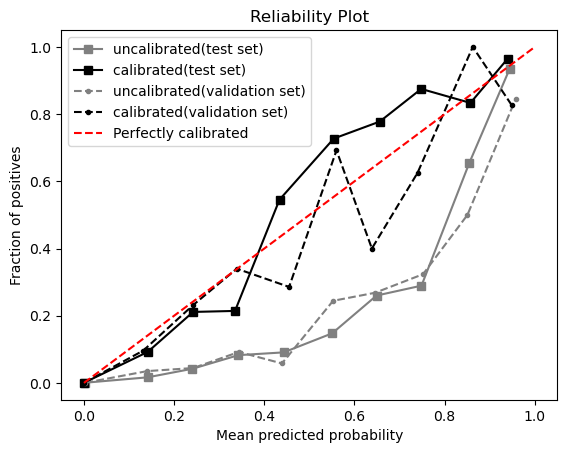

In [1]:
from calibration import Calibrate

cal = Calibrate('tf_gnn_static_dx', calibrate = 1)

In [2]:
from identify_high_risk_individuals import Identify_HR

In [9]:
hr = Identify_HR()

Optimal Threshold: 0.23075446486473083
Maximum F1 Score: 0.35856573705179284
1657/1657 [==============================] - 2s 1ms/step


In [10]:
hr_pat = hr.hr

In [13]:
for m, data in hr_pat.items():
    print(m, len(data['labels']), sum(data['labels']))

3m 70 67.0
6m 7 2.0
12m 6 1.0
36m 5 0.0
60m 8 0.0


In [14]:
import numpy as np
ctrl = []
for m, data in hr_pat.items():
    ctrl.extend(data['patids'][np.where(np.array(data['labels'])==0)[0]].tolist())

In [15]:
from collections import Counter
Counter(ctrl)

Counter({'5142789': 5,
         '3368469': 5,
         '4079026': 4,
         '3147066': 2,
         '3474468': 2,
         '7564418': 1,
         '6112872': 1,
         '6339746': 1,
         '9065192': 1,
         '1892427': 1,
         '503183': 1,
         '5032633': 1,
         '1790247': 1})

In [16]:
from feature_importance import Feature_Imp

In [3]:
import pickle
with open('output/gnn_dx/hr_pat.pickle', 'rb') as handle:
    hr_pat = pickle.load(handle)

In [18]:
fea = Feature_Imp('tf_gnn_dx', hr_pat)

assign reindex to concepts
data reindexing


100%|██████████| 266558/266558 [00:08<00:00, 30227.27it/s]


vocab_size: 13256
create datasets
create trainloaders


In [ ]:
# pat_sample = fea.pat_data['3m']['6169177']
# fea.individual_test(pat_sample)

In [19]:
fea_imp = fea.generate_feature_scores()

100%|██████████| 5/5 [44:02<00:00, 528.49s/it]   


In [21]:
with open('output/gnn_dx/fea_imp.pickle', 'wb') as handle:
    pickle.dump(fea_imp, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
import pickle
with open('output/gnn_dx/fea_imp.pickle', 'rb') as handle:
    fea_imp = pickle.load(handle)

In [13]:
from feature_importance import Feature_Imp

In [14]:
fea = Feature_Imp('tf_gnn_dx', hr_pat)

assign reindex to concepts
data reindexing


100%|██████████| 266558/266558 [00:05<00:00, 49588.93it/s]


vocab_size: 13256
create datasets
create trainloaders


In [15]:
avg_rank = fea.avg_rank_sum(fea_imp)

e:\GNN exp\feature_importance.py:74: DtypeWarning: Columns (5,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  concept = pd.read_csv('graph_data/concept.csv')


In [16]:
avg_rank['60m']

[('Disorder of pancreas', 1.0),
 ('Atrophy of edentulous alveolar ridge', 1.0),
 ('Jaundice', 2.0),
 ('Acute duodenal ulcer without hemorrhage AND without perforation but with obstruction',
  2.0),
 ('Acute necrosis of pancreas', 2.0),
 ('Spasmodic torticollis', 2.0),
 ('Cyst and pseudocyst of pancreas', 2.3333333333333335),
 ('Atelectasis', 3.0),
 ('Congenital anomaly of stomach', 3.0),
 ('Malaise', 3.0),
 ('Malnutrition (calorie)', 3.0),
 ('Calculus of bile duct without obstruction', 3.0),
 ('Tremor', 3.0),
 ('Ascites', 3.6666666666666665),
 ('Respiratory complication', 4.0),
 ('Imaging of abdomen abnormal', 4.0),
 ('Disease of liver', 4.0),
 ('Disorder of upper gastrointestinal tract', 4.0),
 ('Cyst of pancreas', 4.0),
 ("Parkinson's disease", 4.0),
 ('Gout', 5.0),
 ('Esophagitis', 5.0),
 ('Essential hypertension', 5.0),
 ('Gastrointestinal hemorrhage', 5.0),
 ('Bacterial infectious disease', 5.0),
 ('Abnormal findings on diagnostic imaging of urinary organs', 5.0),
 ('Fetal or neon